
# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
   
</ul>

<a id='intro'></a>
## Introduction

This data analysis investigates information about 10000 movies collected from the movie database (TMDb). By analyzing this data set, I explored which generes were mostly used over time?What were the relationship between movies budget and profit making? What were the name of top ten popular movies and top ten directors based on movies popularity? What were the revenue of movies had top 10 directors?







In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies (1).csv')
df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [5]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [23]:
# Dataframe dimension
df.shape

(10866, 21)

In [172]:
# Dataframe statistics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09



### Data Cleaning (Drop Duplicates and Redundant Columns, Replace Null Values)

In [134]:
# droping column  won't use in data analysis.
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [173]:
# dataframe information after dropping unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
profit            10865 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [135]:
# investigate if there is any duplicates in data set and drop it
sum(df.duplicated())
df.drop_duplicates(inplace=True)

In [140]:
#replace null values with zero
df.fillna(0, inplace=True)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10865 non-null object
director          10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [143]:
# Dataframe statistics after removing null values
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres were most frequent over time?)

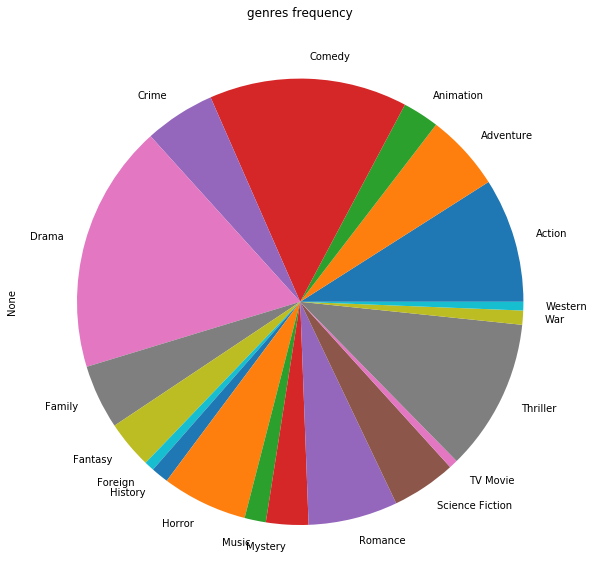

In [142]:
# seperate different genres from the genres column
df_genres=df.genres.str.split('|', expand=True)
df
# calculate the quantity of each genre
df_genres=df_genres.apply(pd.Series.value_counts)
df_genres=df_genres[0]+df_genres[1]+df_genres[2]+df_genres[3]+df_genres[4]
df_genres
# Plot the frequency of genres
df_genres.plot(kind='pie', title='genres frequency', figsize=(10,15))

 Answer: The most ferequent genres were drama, comedy, thriller and action

### Research Question 2  (How is the budget and profit make for movies over time?

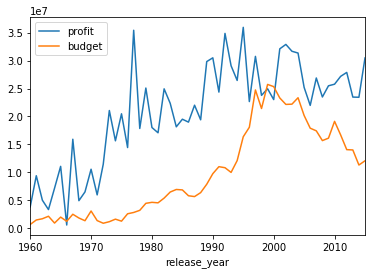

In [144]:
#find profit from revenue and budget
df['profit']=df['revenue']-df['budget']

# find average budget and profit make over time
profit_avg = df.groupby('release_year')['profit'].mean()
budget_avg=df.groupby('release_year')['budget'].mean()

# Plot budget and profit make versus movies release year
ax=profit_avg.plot(kind='line', x='release_year', y='profit', legend=True)

budget_avg.plot(kind='line', x='release_year', y='profit', legend=True)



#Answer: The budget for movies are increasing over time till year=2000 and then it went down, while profit make is increasing. Most of the time the profit make is higher than the budget.

### Research Question 3 ( What are 10 most popular movies all the time?)

In [145]:
# Find top 10 movies dataframe
df_max_popularity=df.nlargest(10,'popularity')
Top_popular_movies=df_max_popularity['original_title']
Top_popular_movies.reset_index(drop=True)

0                           Jurassic World
1                       Mad Max: Fury Road
2                             Interstellar
3                  Guardians of the Galaxy
4                                Insurgent
5      Captain America: The Winter Soldier
6                                Star Wars
7                                John Wick
8             Star Wars: The Force Awakens
9    The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

### Research Question 4 ( Who are best 10 directors based on movies popularity?)


In [156]:
#determine the highest popular movies
df_max_popularity=df.nlargest(10, 'popularity')
# find top 10 directors dataframe based on movies popularity
Top_Director=df_max_popularity['director']
Top_Director=Top_Director.reset_index(drop=True)
# convert dataframe to list
Top_Director_list=Top_Director.tolist()
Top_Director_list

['Colin Trevorrow',
 'George Miller',
 'Christopher Nolan',
 'James Gunn',
 'Robert Schwentke',
 'Joe Russo|Anthony Russo',
 'George Lucas',
 'Chad Stahelski|David Leitch',
 'J.J. Abrams',
 'Francis Lawrence']

### Research Question 5 ( What were movies revenue from top ten directors?)

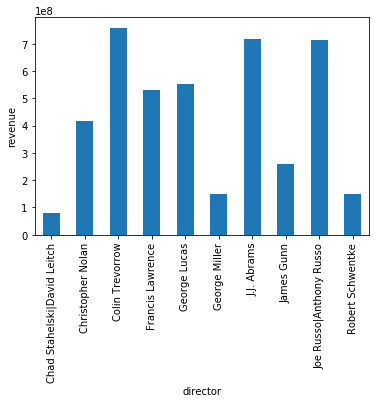

In [170]:
# find dataframe consisting top ten directors names
df1=df[df['director'].isin (Top_Director_list)]
# find movies revenue for top 10 directors
revenue_director=df1.groupby('director')['revenue'].mean()
# plot bar chart of movies revenue versus director name
pt=revenue_director.plot(kind='bar');
pt.set_xlabel('director')
pt.set_ylabel('revenue')
plt.show()


<a id='conclusions'></a>
## Conclusions

#1.Drama and comedy genres were the most popular genres over time. 
#2.Both movies budget and profit making increased over time while profit make were almost all of the time higher than budget.
#3. Collin Trevorrow's movie made the most revenue between top 10 directors.

## Limitation
The null values were study limitations. As these values were not numbers, they had least impact on the analysis